In [13]:
import pandas as pd
agw = pd.read_stata("agwfile1")
gez = pd.read_stata("gezfile1")

Vragenlijst Wonen en Hypotheken
B26Og eigenaar van woning (1=ja, 0=nee)
B26Hy hypotheken op de woning
B26Vz cash value levensverzekering hypotheek woning
B27Og eigenaar van tweede woning (1=ja, 0=nee)
B27Hy hypotheken op tweede woning
B27Vz cash value levensverzekering hypotheek tweede woning

### Eerst maak ik de Net-worth variabele

Dit doe ik dmv een functie die alle bezittingen (b1b, b2b, ..., b30b) bij elkaar optelt en daar de schulden (s1b, s2b, ..., s8b, x1b) vanaf trekt.

In [14]:
def calcWealth(row):
    wealth = (row["b1b"] + row["b2b"] + row["b3b"] + row["b4b"] + row["b6b"] + row["b7b"] + row["b8b"] + row["b11b"]
              + row["b12b"] + row["b13b"] + row["b14b"] + row["b15b"] + row["b16b"] + row["b17b"] + row["b18b"] + 
             row["b19ogb"] + row["b19hyb"] + row["b19vzb"] + row["b20b"] + row["b21b"] + row["b22b"] + row["b23b"] +
             row["b24b"] + row["b25b"] + row["b28b"] + row["b29b"] + row["b30b"])
    # Door te checken of b26ogb > -1 zorg ik dat enkel rows zonder NaN hier worden gebruikt. Ze zijn of volledig Nan of niet
    if row["b26ogb"] > -1:
        wealth += row["b26ogb"] + row["b26vzb"] + row["b27ogb"] + row["b27vzb"]
    return wealth

In [15]:
def calcDebt(row):
    debt = (row["s1b"] + row["s2b"] + row["s3b"] + row["s4b"] + row["s5b"] + row["s6b"] + row["s7b"] + row["s8b"] + 
           row["x1b"])
    # Door te checken of b26ogb > -1 zorg ik dat enkel rows zonder NaN hier worden gebruikt. Ze zijn of volledig Nan of niet
    if row["b26ogb"] > -1:
        debt += row["b26hyb"] + row["b27hyb"]
    
    return debt

In [16]:
def calcNetWorth(row):
    netWorth = row["wealth"] - row["debt"]
    return netWorth

In [17]:
agw["debt"] = agw.apply(calcDebt, axis = 1)


In [18]:
agw["wealth"] = agw.apply(calcWealth, axis = 1)


In [19]:
agw["netWorth"] = agw.apply(calcNetWorth, axis = 1)

In [47]:
# Counter om aantal positieve en negatieve networths te tellen
pos = 0
neg = 0
zero = 0

# Arrays om de negatieven en positieven networths bij te houden
negatives = []
positives = []

# Bepaald voor iedere row of de networth positief of negatief is en zet deze waarde in een array
for x in range(0, agw.shape[0] - 1):
    if agw.loc[x,"netWorth"] > 0:
        positives.append(agw.loc[x, "netWorth"])
        pos += 1
    elif agw.loc[x, "netWorth"] < 0:
        negatives.append(agw.loc[x, "netWorth"])
        neg += 1
    else:
        zero += 1
        
print("aantal positieve networth: " + str(pos) +  " aantal negatieve networth: " + str(neg))
print("aantal met net worth nul (waarschijnlijk lege entries): " + str(zero))

aantal positieve networth: 2054 aantal negatieve networth: 223
aantal met net worth nul (waarschijnlijk lege entries): 81


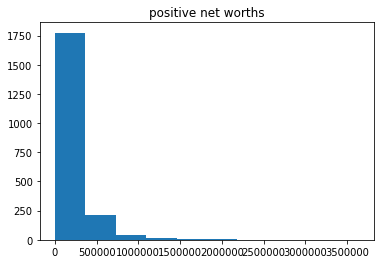

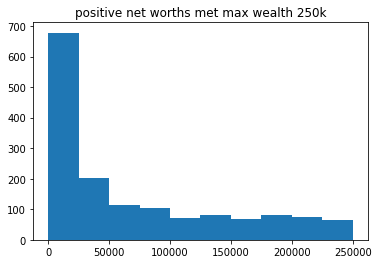

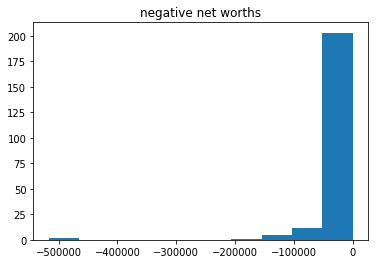

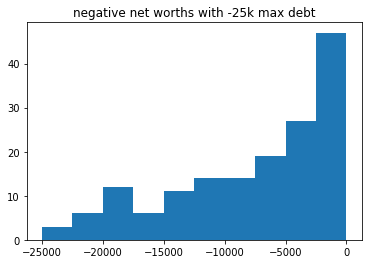

In [48]:
import matplotlib.pyplot as plt

negatives.sort()
positives.sort()

plt.hist(positives)
plt.title("positive net worths")
plt.show()

plt.hist(positives, range = (0, 250000))
plt.title("positive net worths met max wealth 250k")
plt.show()

plt.hist(negatives)
plt.title("negative net worths")
plt.show()

plt.hist(negatives, range = (-25000, 0))
plt.title("negative net worths with -25k max debt")
plt.show()





# Hier boven:

het feit dat bezit tot 10x zo veel gaat als schuld, kan leiden tot ene verschil in effect op  gezondheid (bijvoorbeeld 10x minder sterk oid) Misschien hier nog iets mee doen!